# AcousticBrainz Genre Task 2017: Content-based music genre recognition from multiple sources

In [1]:
# Nice graphs for high dpi screens
%config InlineBackend.figure_format = 'retina'

## Install and import packages

In [2]:
!pip install -U scikit-learn[alldeps]
!pip install -U python-dotenv
!pip install -U pandas


Requirement already up-to-date: scikit-learn[alldeps] in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages
Requirement already up-to-date: numpy>=1.6.1; extra == "alldeps" in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from scikit-learn[alldeps])
Requirement already up-to-date: scipy>=0.9; extra == "alldeps" in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from scikit-learn[alldeps])
Requirement already up-to-date: python-dotenv in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages
Requirement already up-to-date: click>=5.0 in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from python-dotenv)
Requirement already up-to-date: pandas in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages
Requirement already up-to-date: numpy>=1.7.0 in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages

In [ ]:
pip install nbstripout
pip install nbformat

In [313]:
from os import environ
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

settings = {
    "path": environ.get("PATH_TO_DATASET"),
    "loaded_data": environ.get('LOADED_TRAINING_DATA'),
    
    "very_few": environ.get('VERY_FEW_RECORDS', False),  # Limit the dataset to very few records, useful during development
}

You **must** restart the kernel after first instaling or updating packages!

In [3]:
from sklearn import svm
import pandas as pd
import json


In [314]:
# Read tsv file into groundtruth and extract only id and main genre from it
groundtruth_raw = pd.read_table(settings['path'] + 'groundtruth/acousticbrainz-mediaeval2017-tagtraum-train.tsv')
groundtruth_raw = groundtruth_raw[['recordingmbid', 'genre1']]

def isInLoadedDataset(id):
    return id[0] in settings['loaded_data']
    
groundtruth_available = groundtruth_raw.apply(lambda x: isInLoadedDataset(x['recordingmbid']), axis=1)
groundtruth = groundtruth_raw[groundtruth_available]
print 'Groundtruth raw: %d' % len(groundtruth_raw)
print 'Groundtruth only available: %d' % len(groundtruth)


print 'Found {} unique genres.'.format(len(groundtruth['genre1'].unique()))


Groundtruth raw: 486740
Groundtruth only available: 30599
Found 31 unique genres.


In [315]:
myset = set(groundtruth['genre1'])

In [6]:
import numpy as np
groundtruth.iloc[0]

recordingmbid    05a1243a-d359-4b8a-b297-e17300a232f3
genre1                                       rock/pop
Name: 53, dtype: object

### Only run for manual sampling method

In [276]:
new_groundtruth = pd.DataFrame()

for i in myset:
    sampling_groundtruth = groundtruth.loc[groundtruth['genre1'] == i]
    if (len(sampling_groundtruth) < 300):
        sampling_groundtruth = sampling_groundtruth     
    else:
        sampling_groundtruth = sampling_groundtruth.sample(n=300)
    
    if new_groundtruth.empty :
        new_groundtruth = sampling_groundtruth
    else:
        new_groundtruth = new_groundtruth.append(sampling_groundtruth)
    

In [277]:
new_groundtruth

,recordingmbid,genre1
222,01a51a19-c7ec-4c23-9766-0f4066883c56,industrial
5163,071d0d90-8491-4767-abaf-6a9126ffdd0a,industrial
5211,075a65b3-459c-42bc-ad77-502e271d4569,industrial
5528,01bb48f2-e003-4a21-a54d-e97f6316582a,industrial
7841,0da135df-ca04-4de6-b1c8-4f1fc596c9fa,industrial
8312,06216e01-489e-493c-b060-a0239f9d0c15,industrial
9809,0636d72b-0fc8-4d25-a931-1ba7e0ae56bb,industrial
10063,092a92c9-1810-45f1-b029-e605a85f0af4,industrial
10901,03e223f0-950c-456b-9eaa-e5d4919d62b4,industrial
11687,0987b120-bcdf-4492-8938-64af3ddce127,industrial


In [278]:
print len(new_groundtruth)

6503


In [316]:

if settings['very_few']:
    groundtruth = groundtruth.head(10000)


## Data Understanding

In [8]:
from collections import Counter
genre = Counter(groundtruth.genre1).keys() # equals to list(set(words))
counter = Counter(groundtruth.genre1).values() # counts the elements' frequency

df = pd.DataFrame(genre)
df_2 = pd.DataFrame(counter)
df_new = pd.concat([df, df_2], axis=1)
df_new

,0,0
0,industrial,256
1,childrens,41
2,classical,516
3,dance,1520
4,reggaeton,1
5,dubstep,128
6,blues,777
7,electronic,2106
8,folk,739
9,trance,137


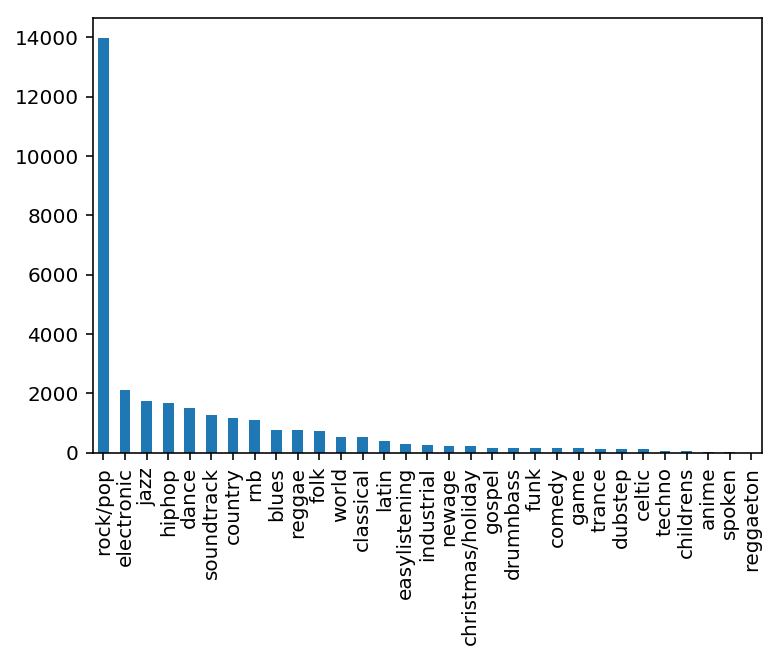

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

groundtruth.genre1.value_counts().plot(kind='bar')
plt.show()
 #show power distribution

## Utility functions

In [317]:
import types

def loadFeatures(recordingmbid):
    feature_file_path = '{basepath}acousticbrainz-mediaeval-train/{id_prefix}/{id}.json'.format(
        basepath = settings['path'], id_prefix=recordingmbid[0:2], id = recordingmbid);
    
    with open(feature_file_path) as feature_file:    
        data = json.load(feature_file)
    
    return data

def pettyPrintJSON(object_to_print):
    print(json.dumps(object_to_print, sort_keys=True, indent=4))
    

def getOnlyUsedFeatures(recordingmbid):
    
    all_features = loadFeatures(recordingmbid)
    
    used_features = [
        'lowlevel.mfcc.mean',
         'lowlevel.average_loudness',
         'lowlevel.spectral_energy.mean']
    
    result_features = []
    
    for feature_name in used_features:
        reduced_features = all_features

        for k in feature_name.split('.'):
            reduced_features = reduced_features[k]
            
        if isinstance(reduced_features, float):
            result_features.append(reduced_features)
        else:
            result_features.extend(reduced_features)
        
    return pd.Series(result_features)
    

training_data = groundtruth['recordingmbid'].apply(getOnlyUsedFeatures)

print training_data.head()

             0           1          2          3         4         5   \
53  -657.453918  131.168411 -21.396561  25.883711  2.958023 -4.221121   
75  -655.049866  114.801537   8.424225  31.174774  3.930190  2.996517   
76  -636.922363   87.851021  -3.941363  36.499954  7.853480  9.568168   
79  -668.672058  112.563072 -10.858009   3.191820 -0.254697  7.438896   
101 -766.844360  163.622360  32.567516  27.516304  1.685182 -5.516138   

            6         7         8         9         10        11        12  \
53   -8.266188  2.564772 -9.723367 -1.022816 -4.348191 -0.485377 -2.467784   
75   -9.183333  3.214548 -2.873540 -0.486388 -4.739548 -3.239610 -3.789270   
76   -3.369406  7.042854 -1.116023  2.816375 -3.556342 -1.763426 -1.386777   
79    2.125311  1.720424  2.723547  7.982056  0.450575  1.793974  3.912993   
101 -11.777446 -8.137603 -6.440309 -2.631488 -6.852347 -4.741800 -3.364228   

           13        14  
53   0.855276  0.019627  
75   0.865318  0.021734  
76   0.904938 

### See distribution of average loudness of each genre music

In [11]:
myset = set(groundtruth['genre1'])

industrial
(10,)


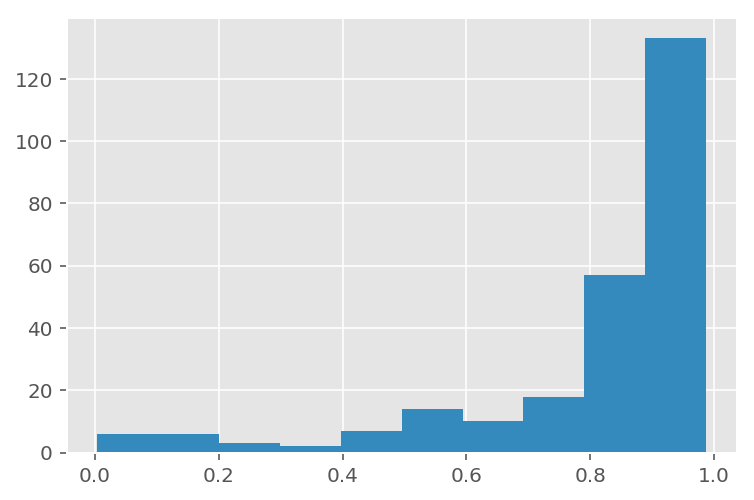

childrens
(10,)


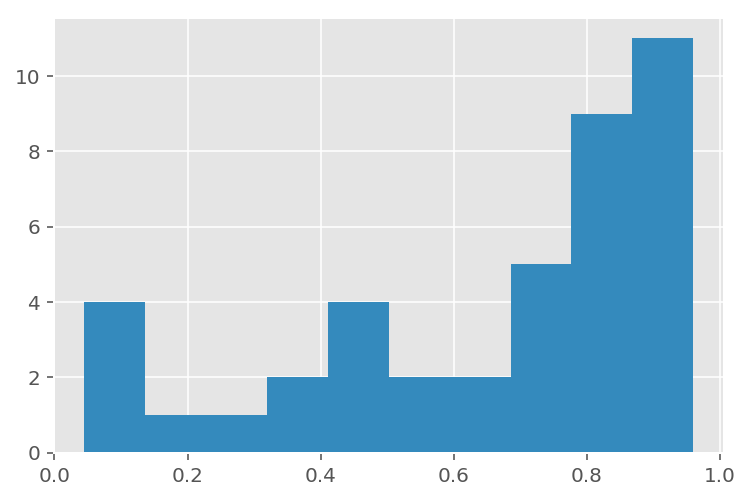

classical
(10,)


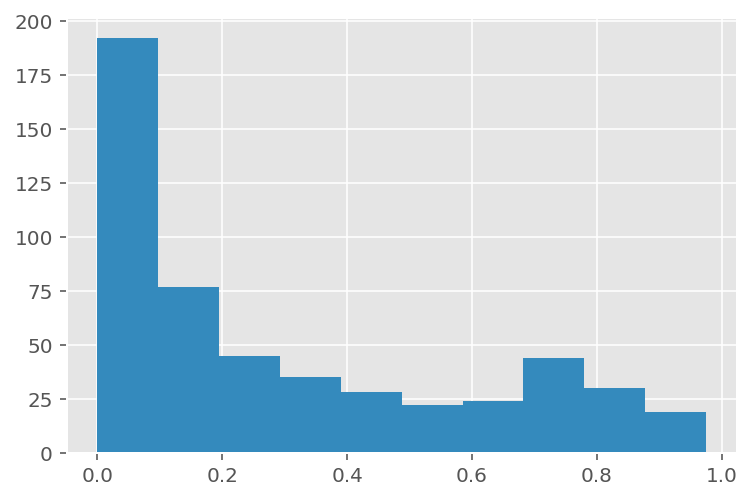

dance
(10,)


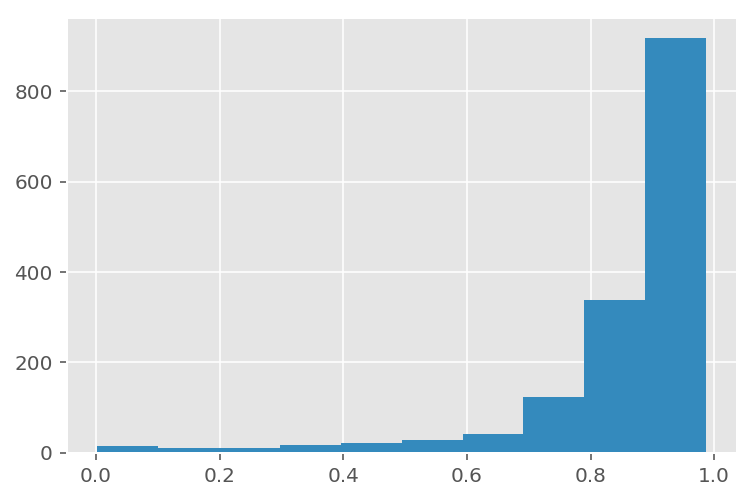

reggaeton
(10,)


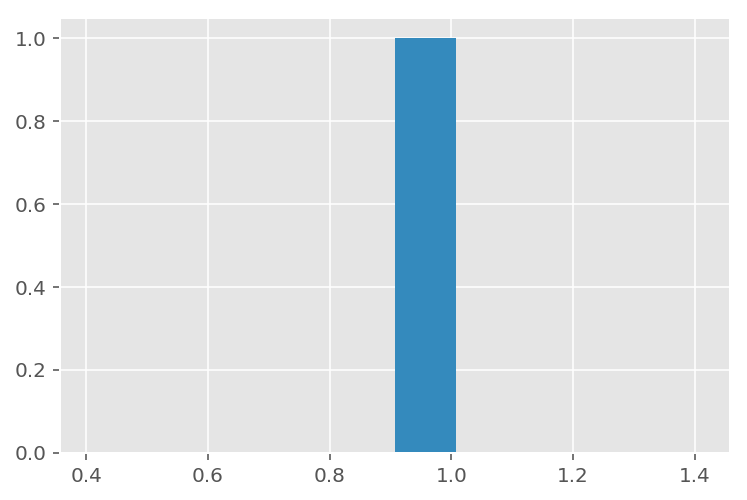

dubstep
(10,)


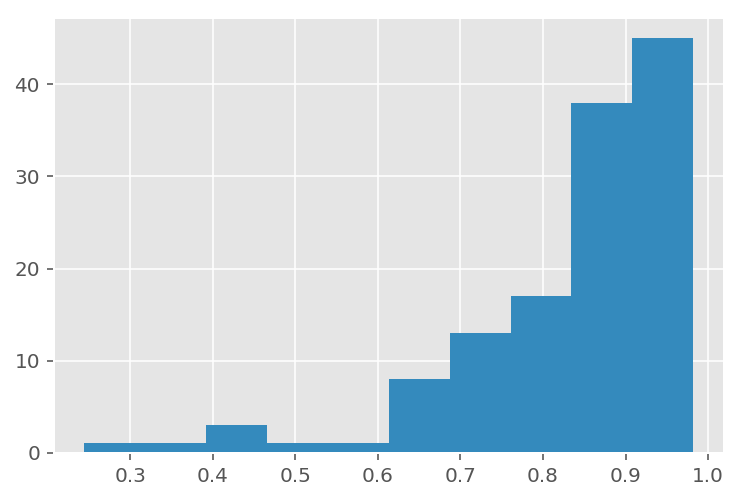

blues
(10,)


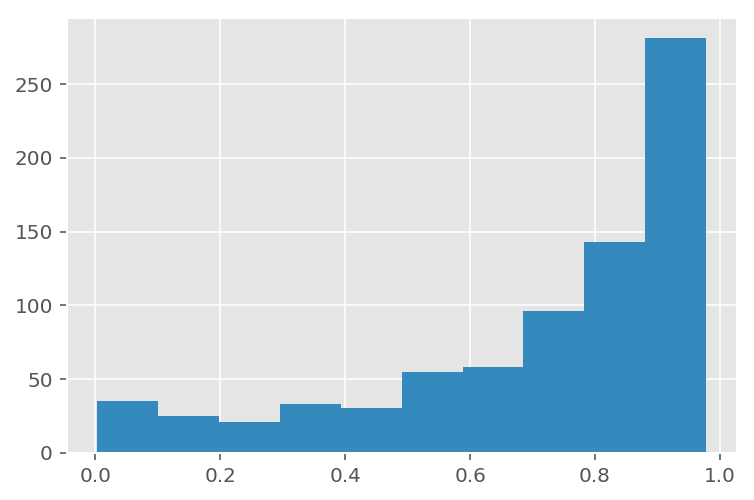

electronic
(10,)


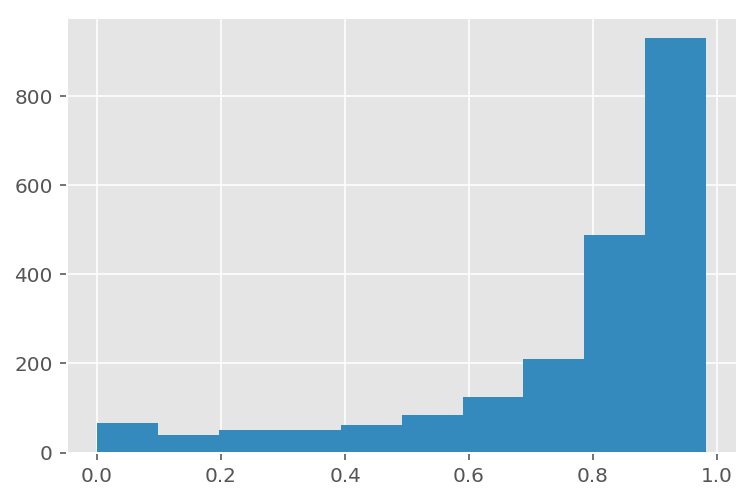

folk
(10,)


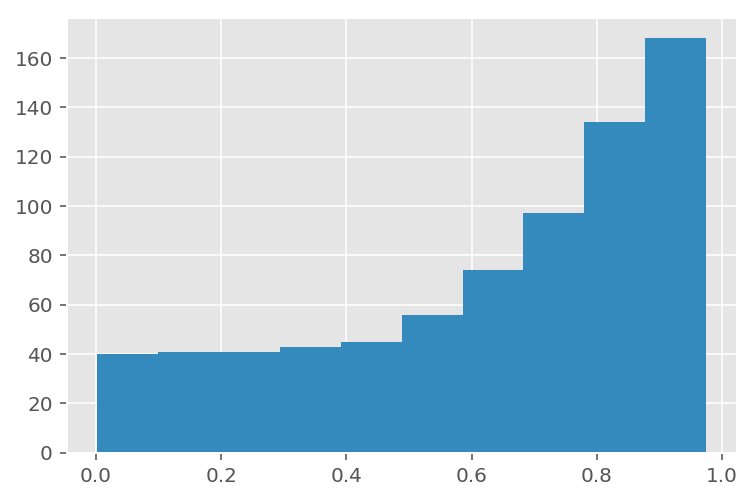

trance
(10,)


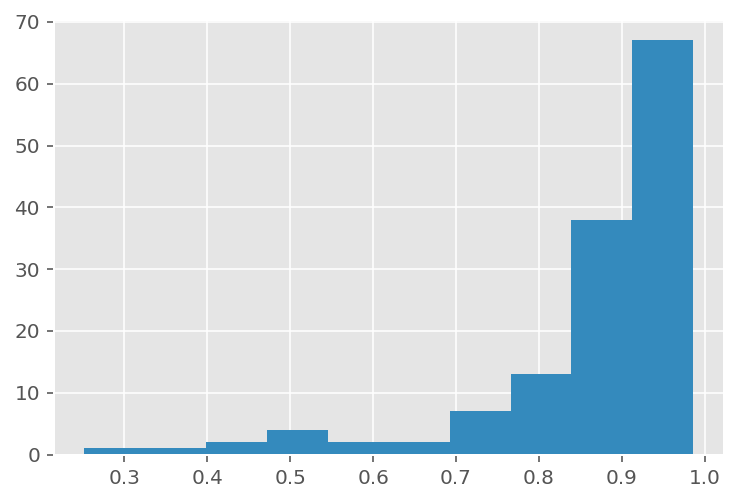

spoken
(10,)


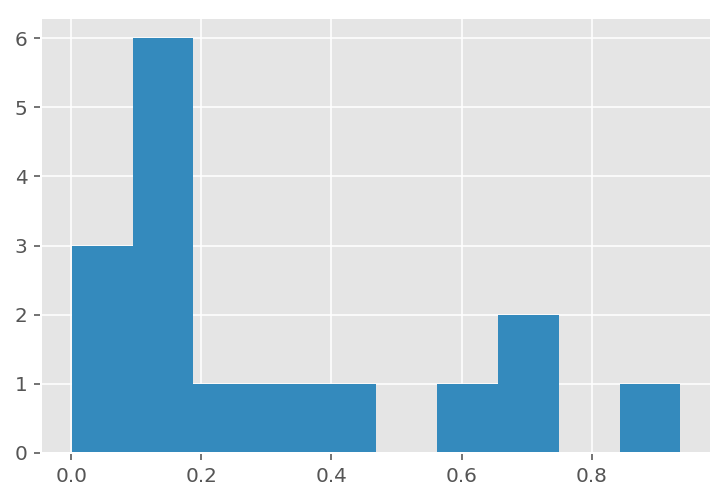

comedy
(10,)


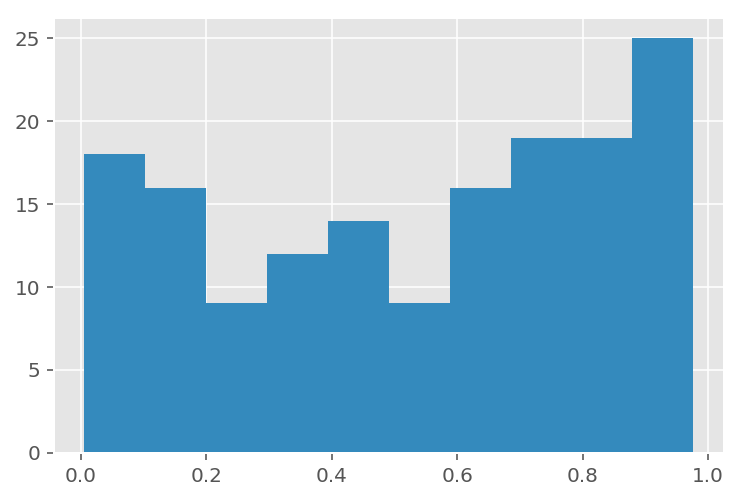

newage
(10,)


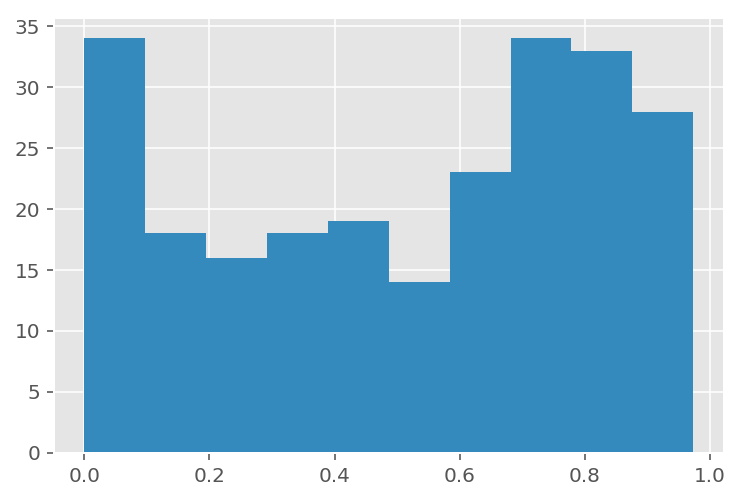

reggae
(10,)


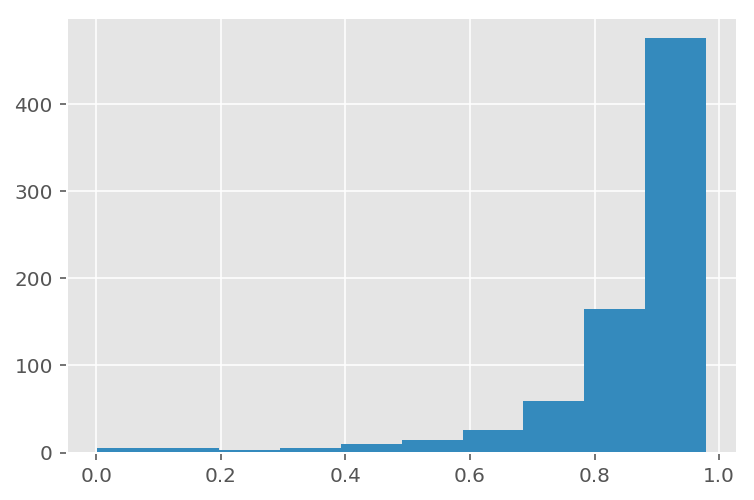

latin
(10,)


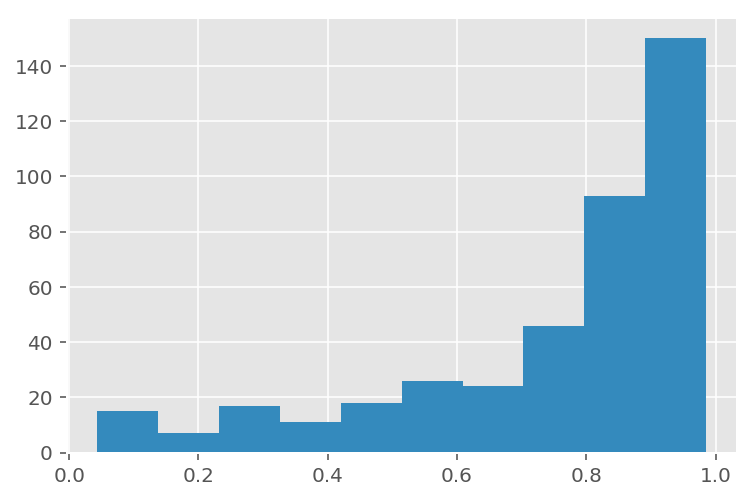

easylistening
(10,)


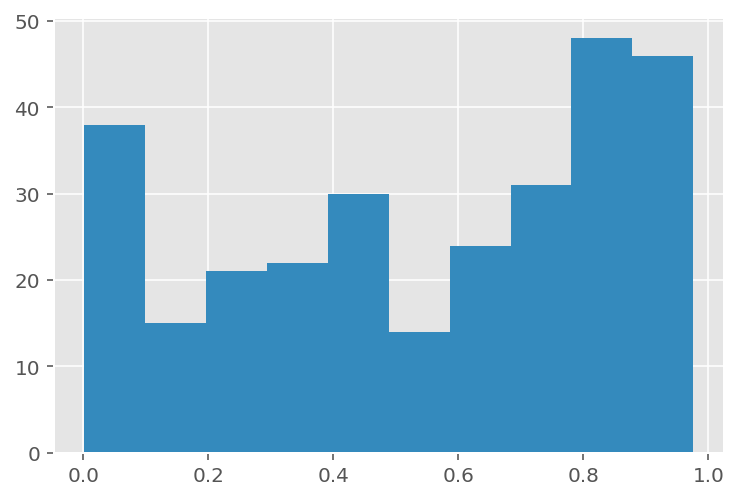

rnb
(10,)


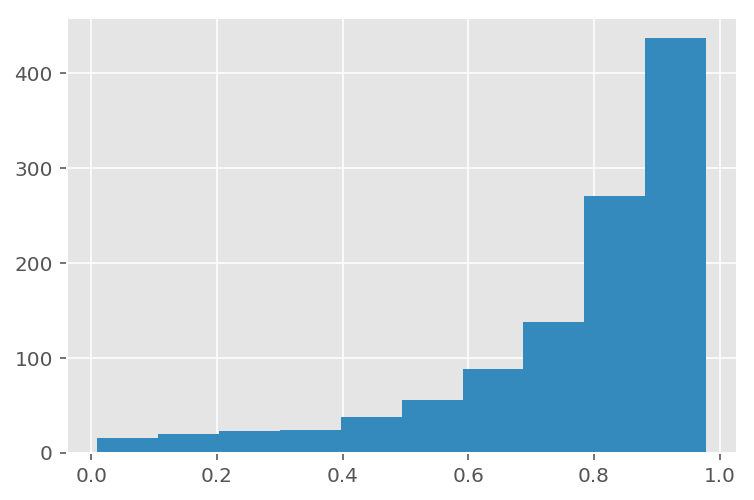

jazz
(10,)


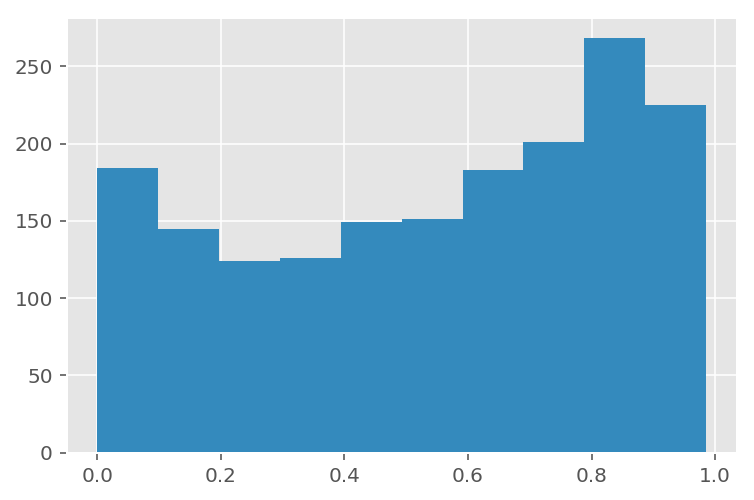

soundtrack
(10,)


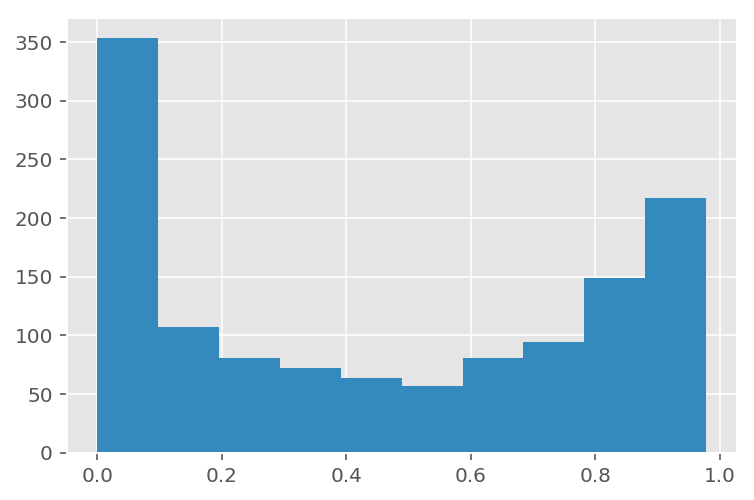

game
(10,)


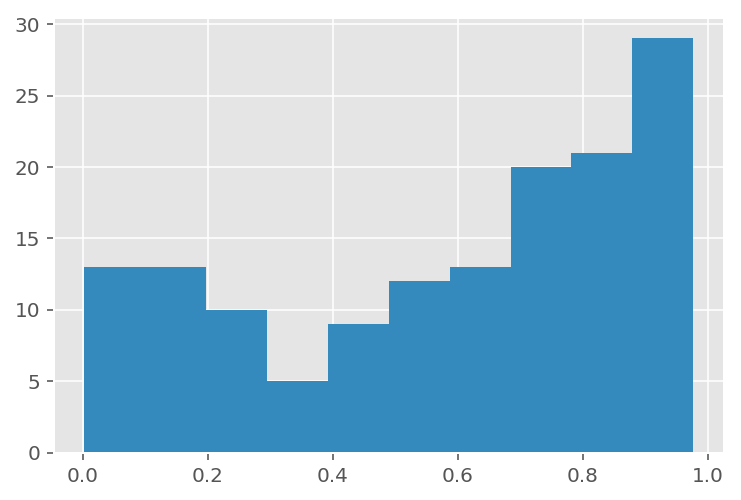

techno
(10,)


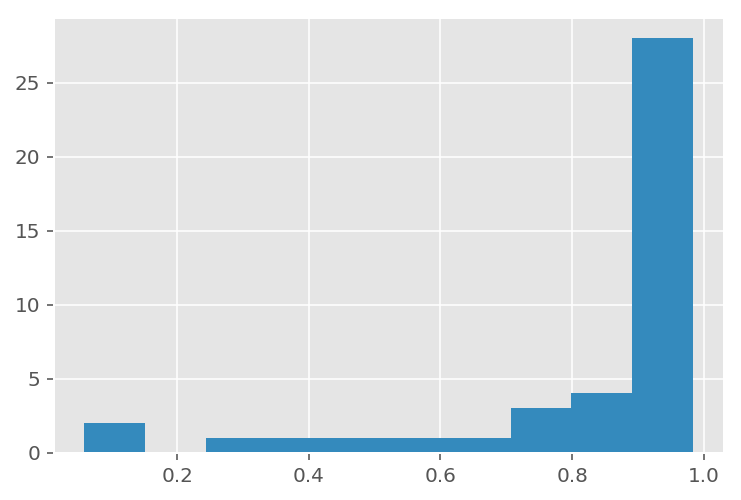

world
(10,)


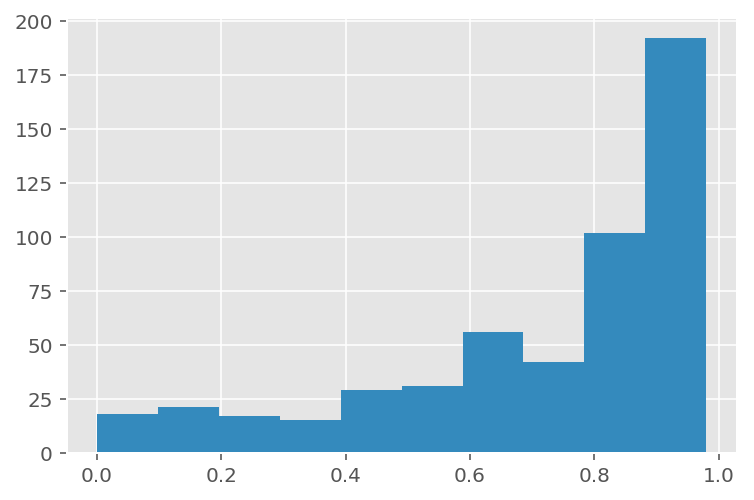

funk
(10,)


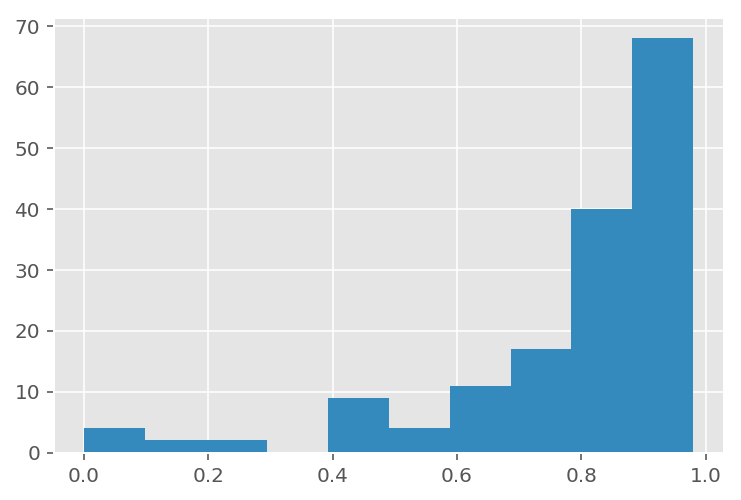

celtic
(10,)


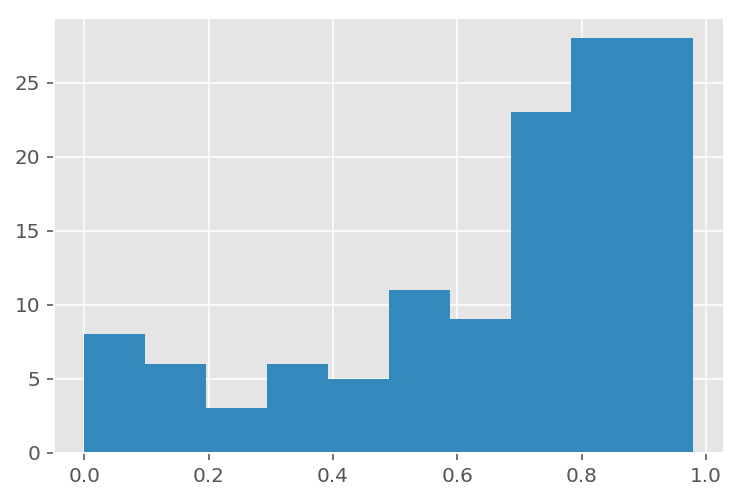

country
(10,)


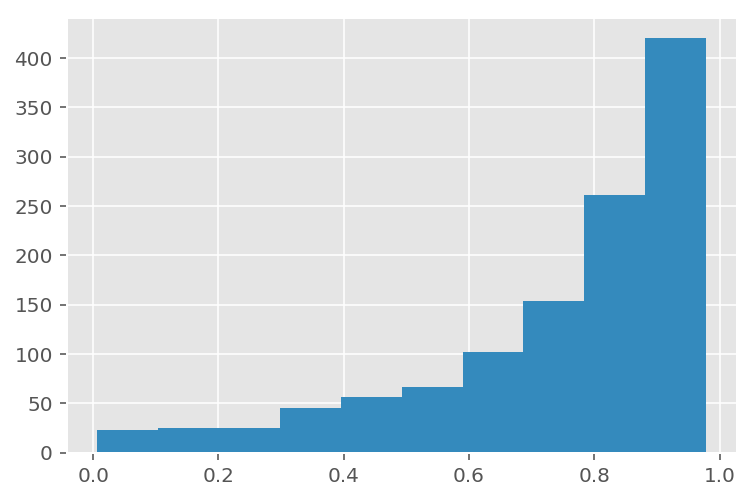

hiphop
(10,)


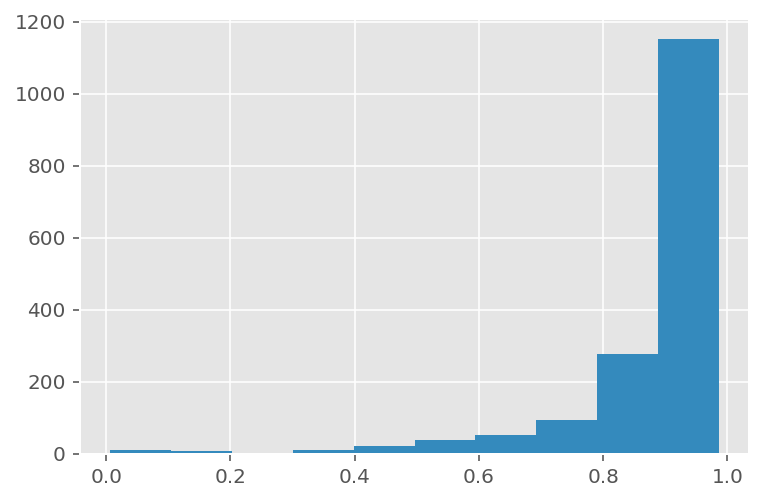

drumnbass
(10,)


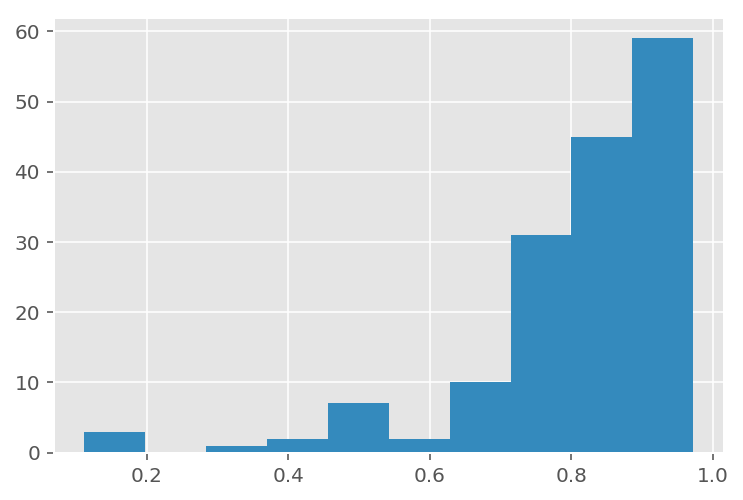

rock/pop
(10,)


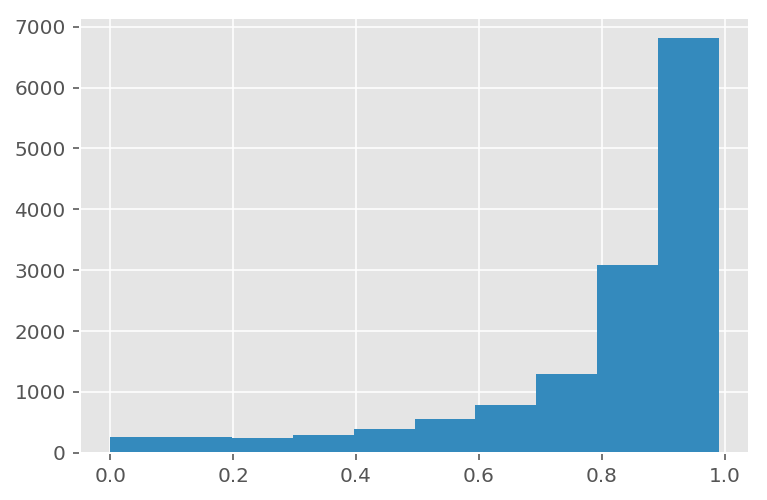

christmas/holiday
(10,)


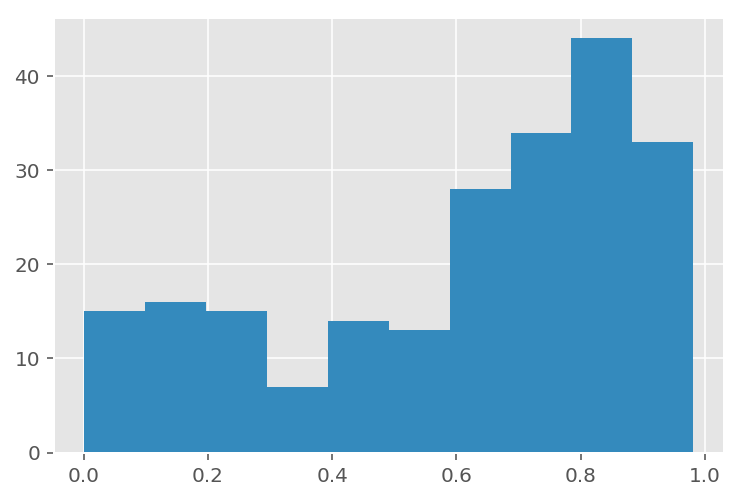

anime
(10,)


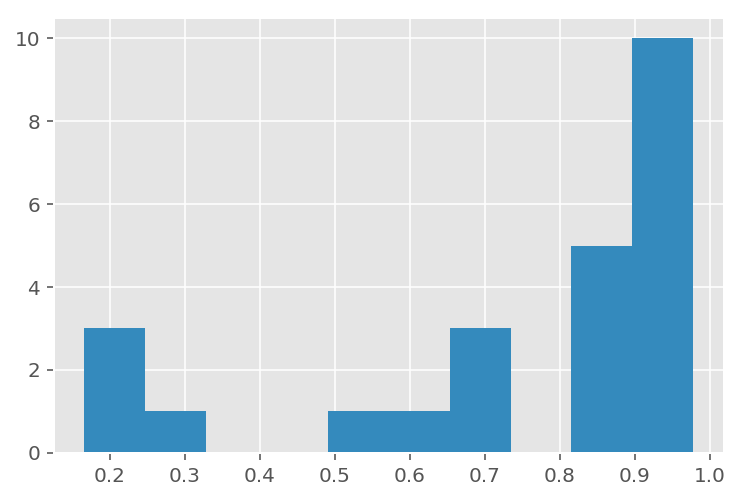

gospel
(10,)


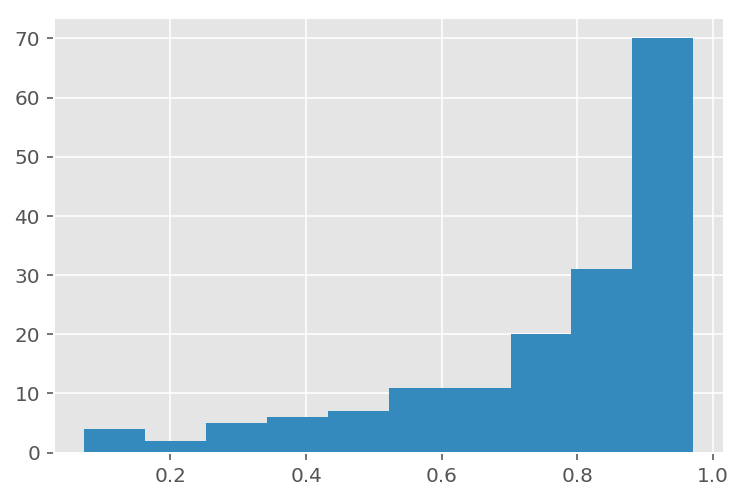

In [342]:
%matplotlib inline 
import numpy as np

hist_loudness = np.arange(10)
j=0

for i in myset:    
    groundtruth_genre = groundtruth[groundtruth['genre1'] == i]
    training_data_genre = groundtruth_genre['recordingmbid'].apply(getOnlyUsedFeatures)
    print i
    loud = plt.hist(training_data_genre[13])
    print np.shape(loud[0])
    hist_loudness = np.vstack((hist_loudness, loud[0]))
    j = j+1
    plt.hist(training_data_genre[13])
    plt.show()
    plt.clf()

### See distribution of spectral energy mean of each genre

industrial
(10,)


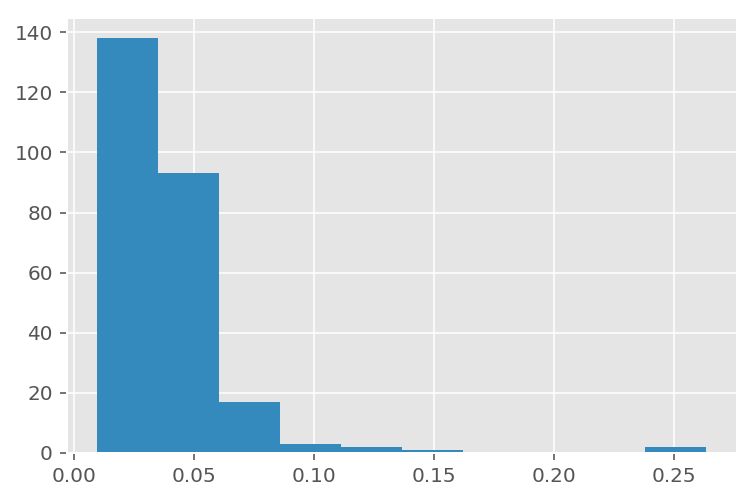

childrens
(10,)


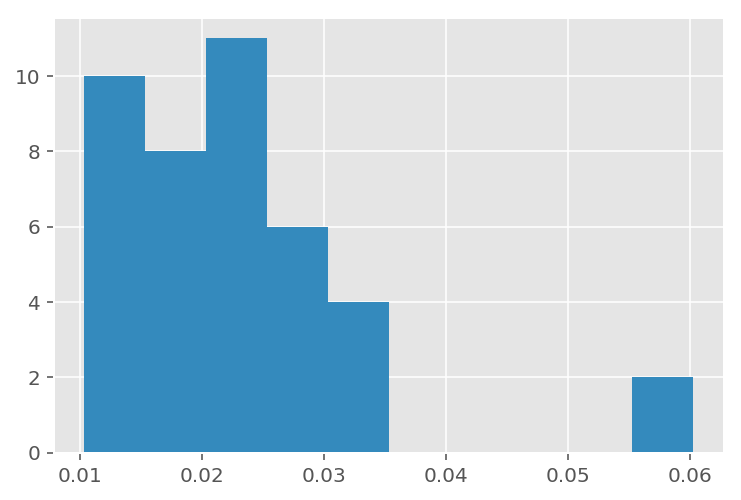

classical
(10,)


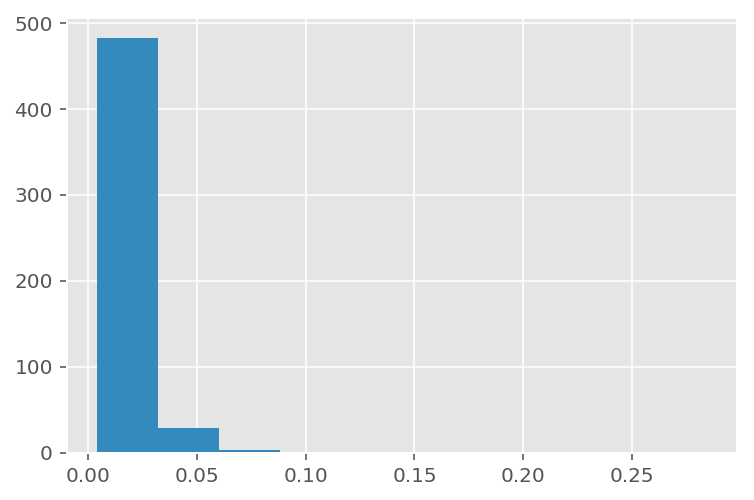

dance
(10,)


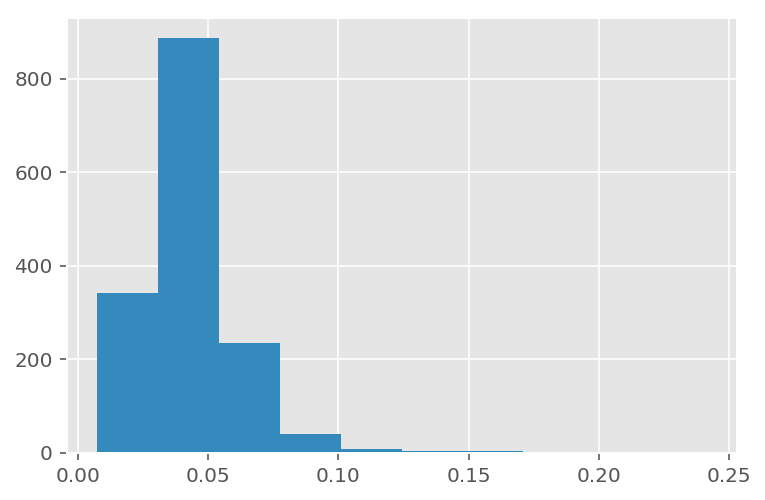

reggaeton
(10,)


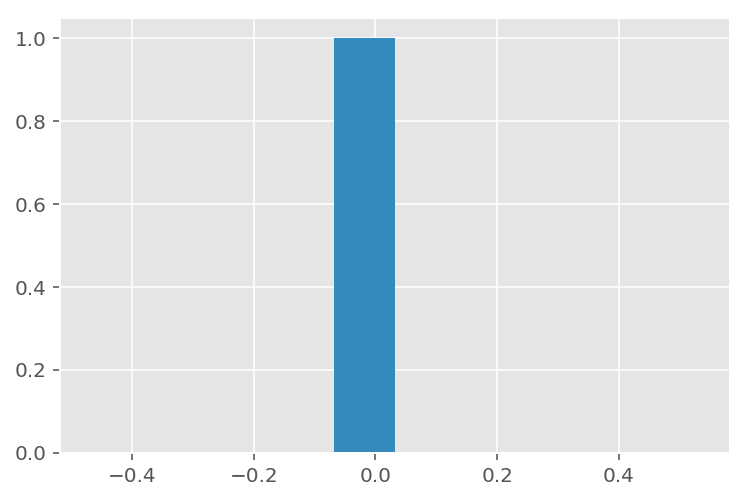

dubstep
(10,)


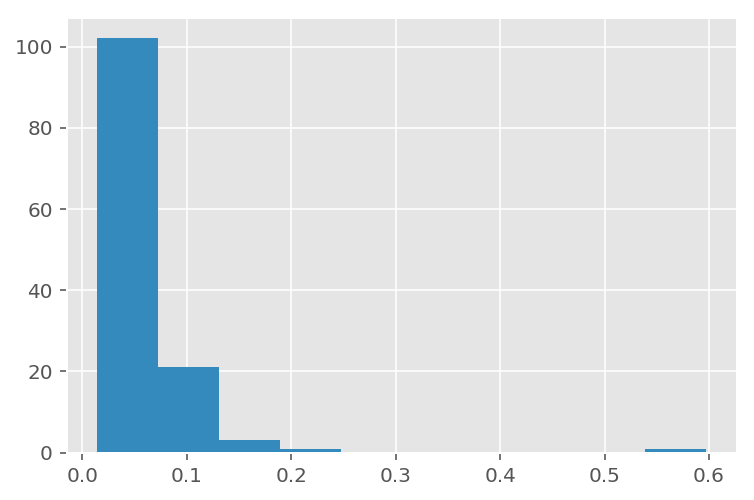

blues
(10,)


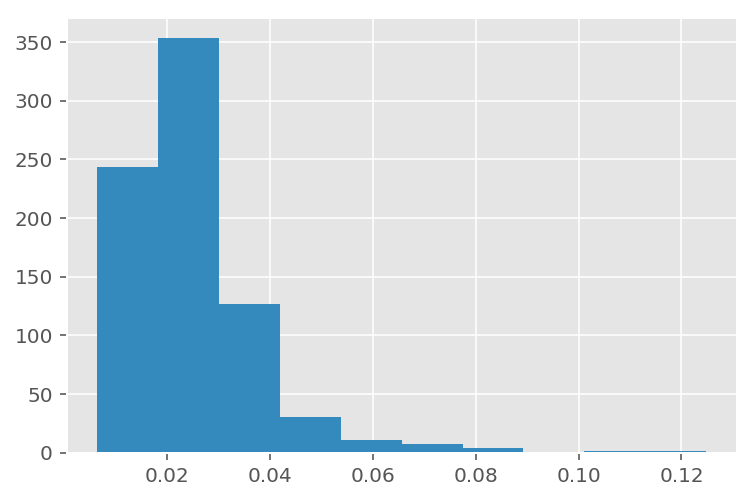

electronic
(10,)


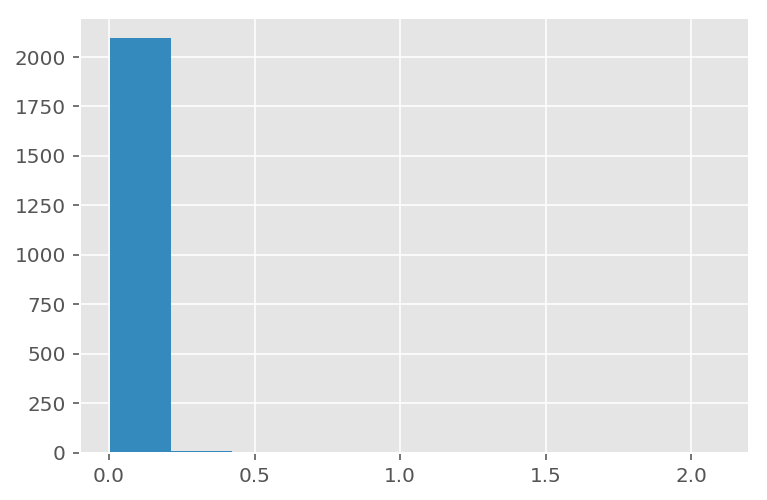

folk
(10,)


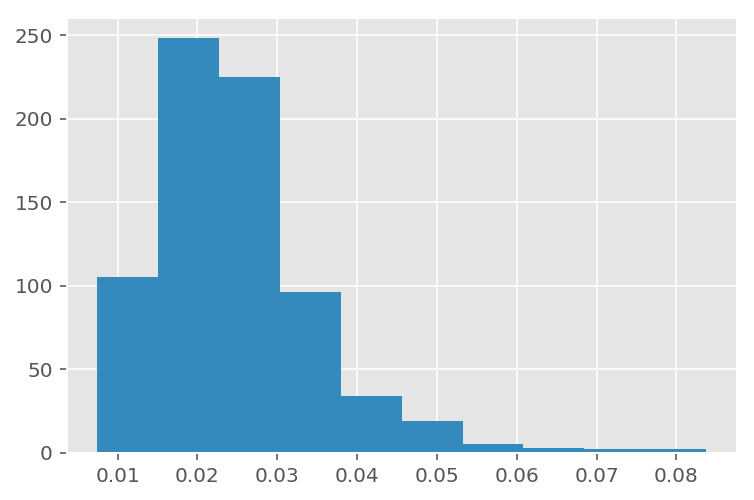

trance
(10,)


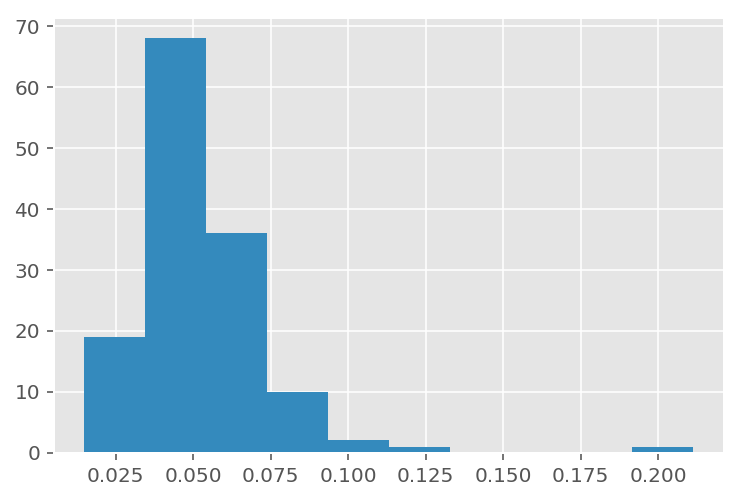

spoken
(10,)


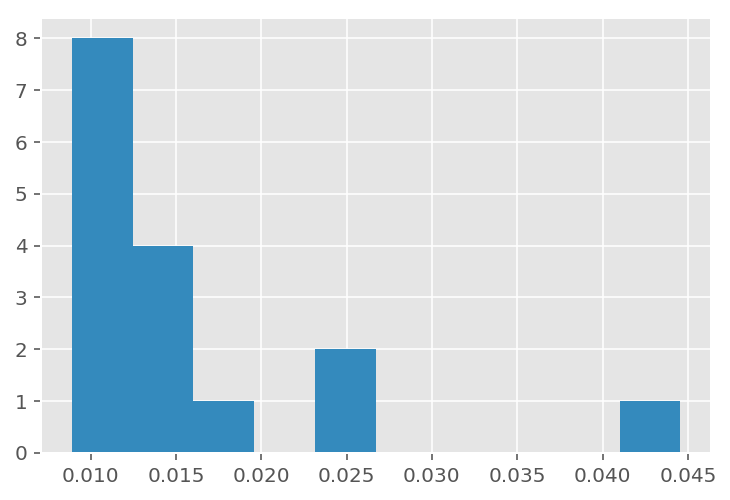

comedy
(10,)


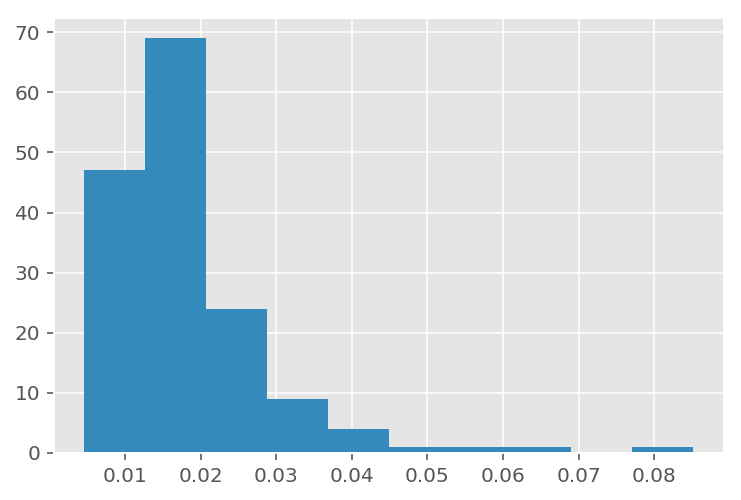

newage
(10,)


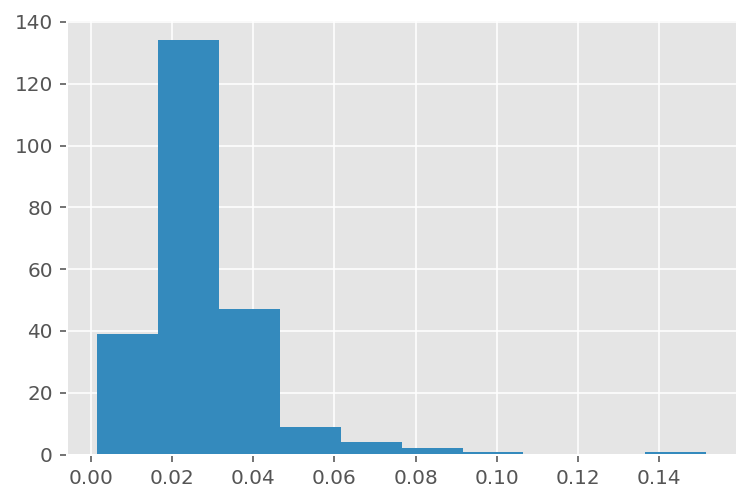

reggae
(10,)


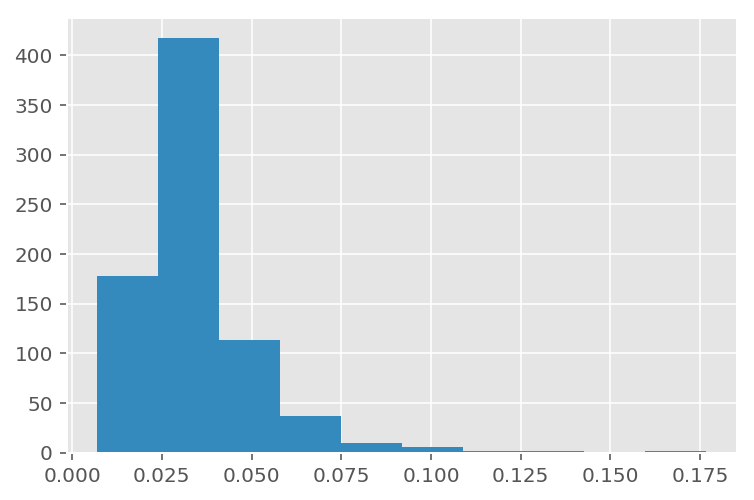

latin
(10,)


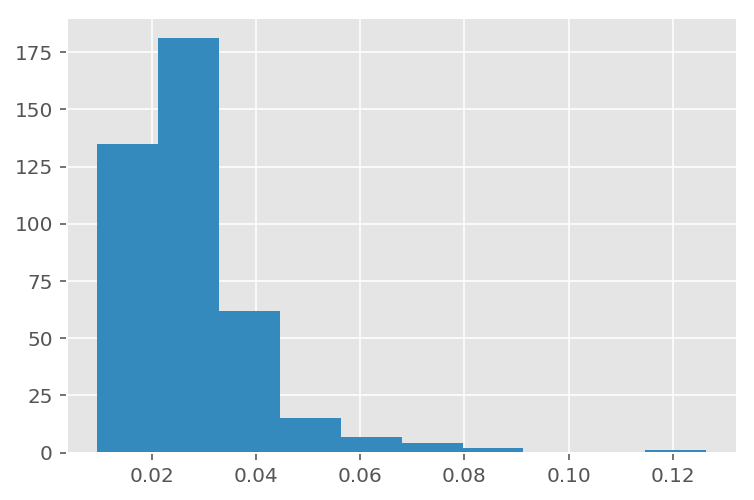

easylistening
(10,)


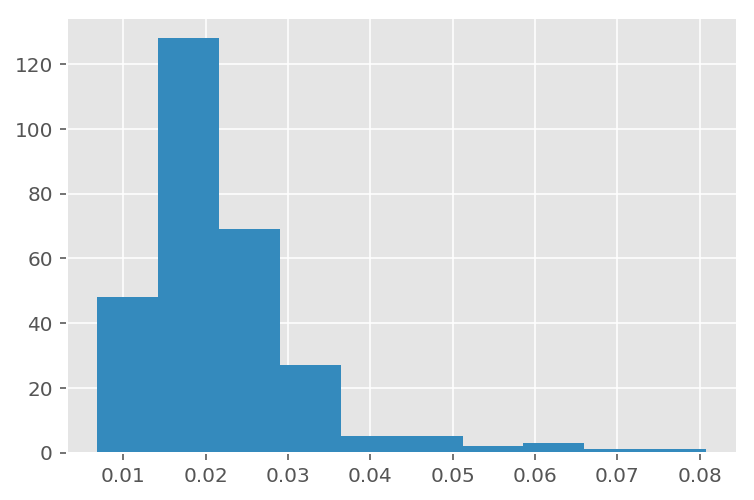

rnb
(10,)


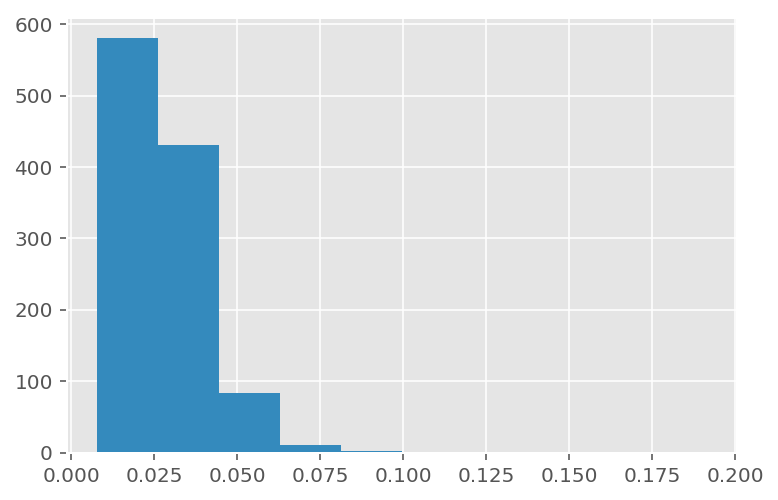

jazz
(10,)


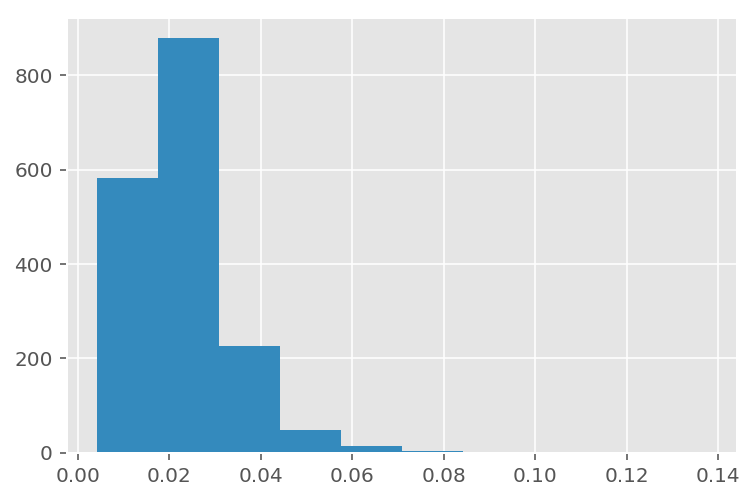

soundtrack
(10,)


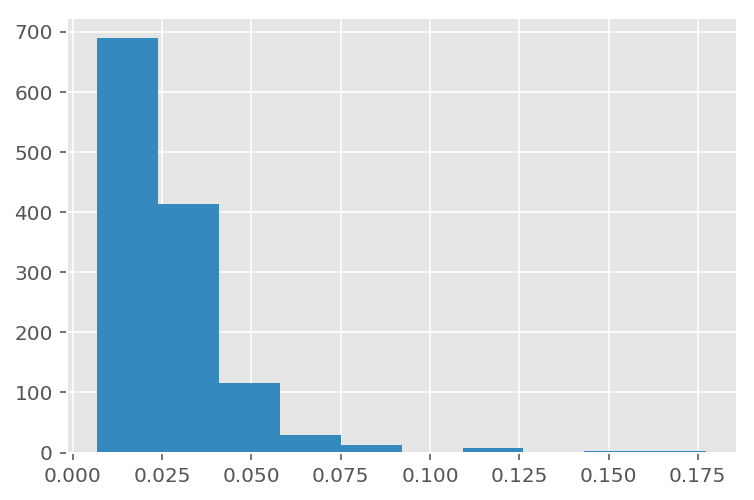

game
(10,)


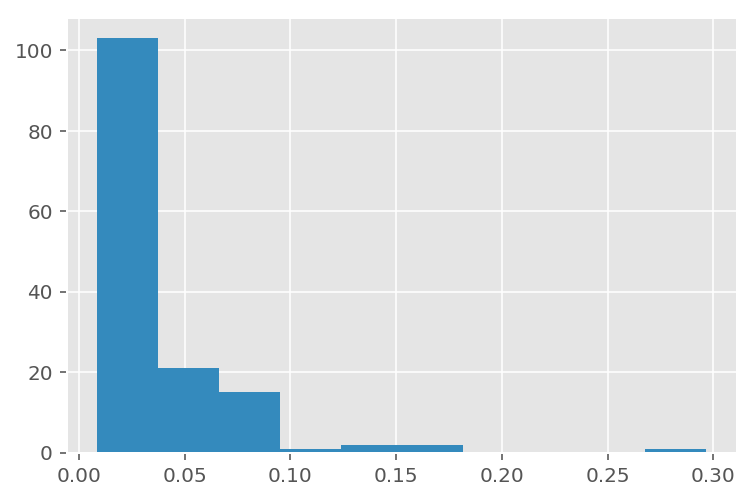

techno
(10,)


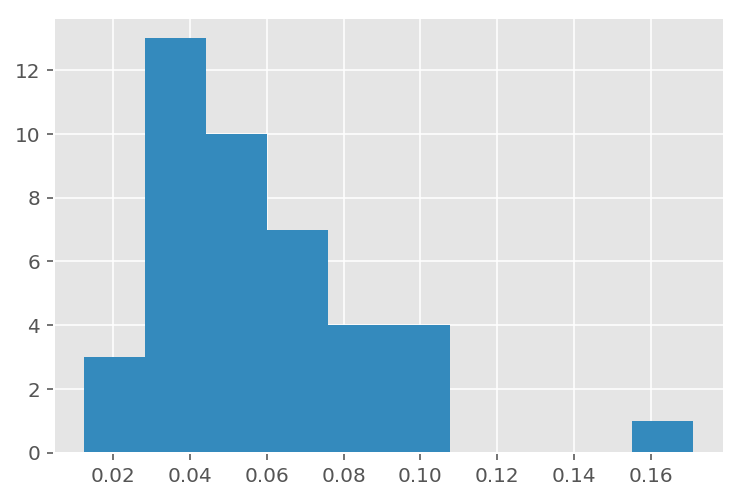

world
(10,)


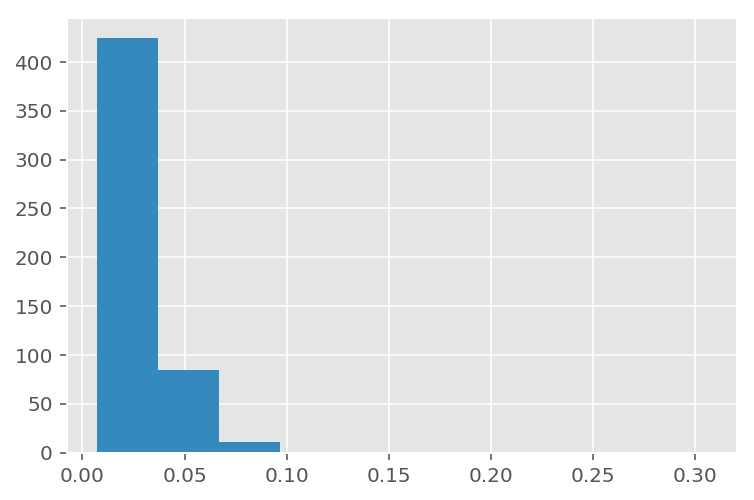

funk
(10,)


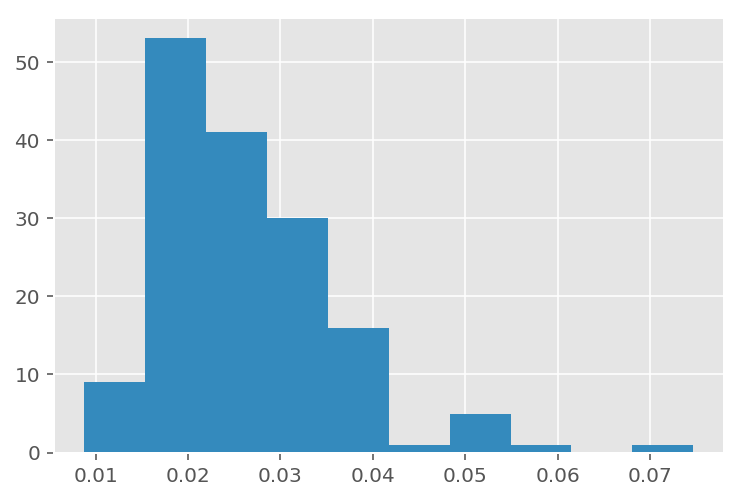

celtic
(10,)


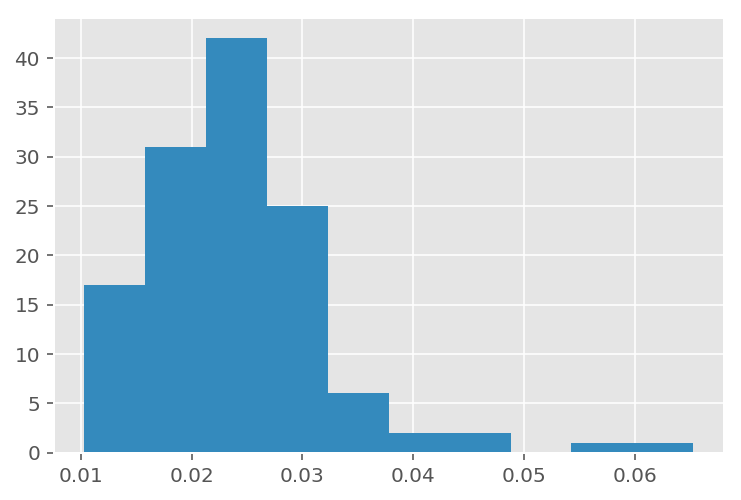

country
(10,)


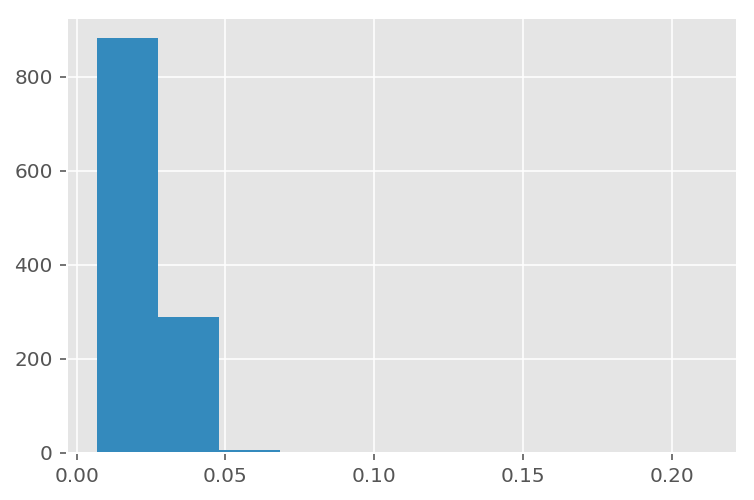

hiphop
(10,)


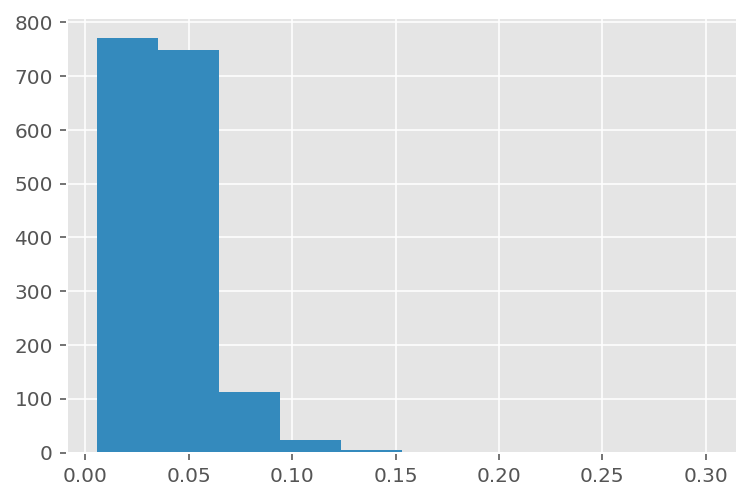

drumnbass
(10,)


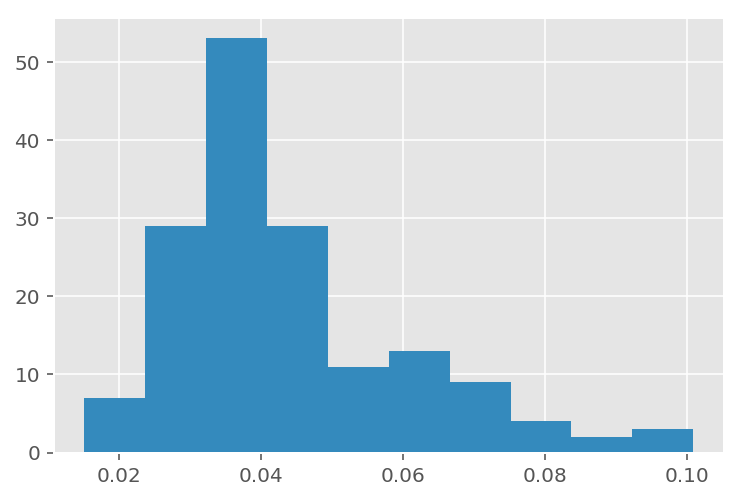

rock/pop
(10,)


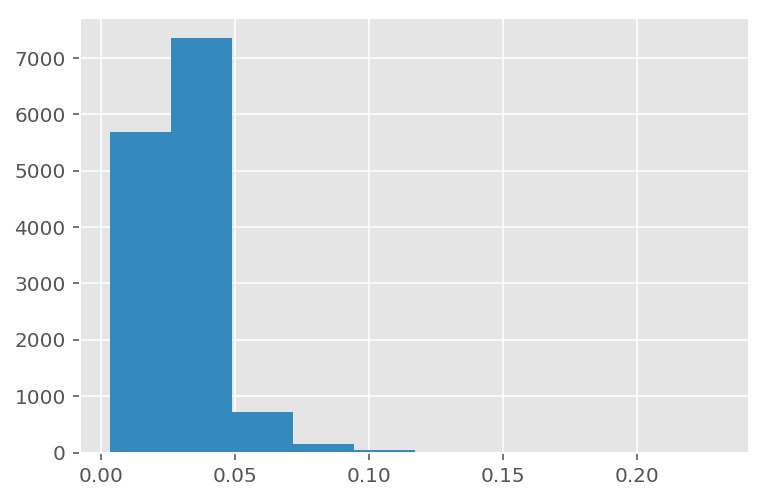

christmas/holiday
(10,)


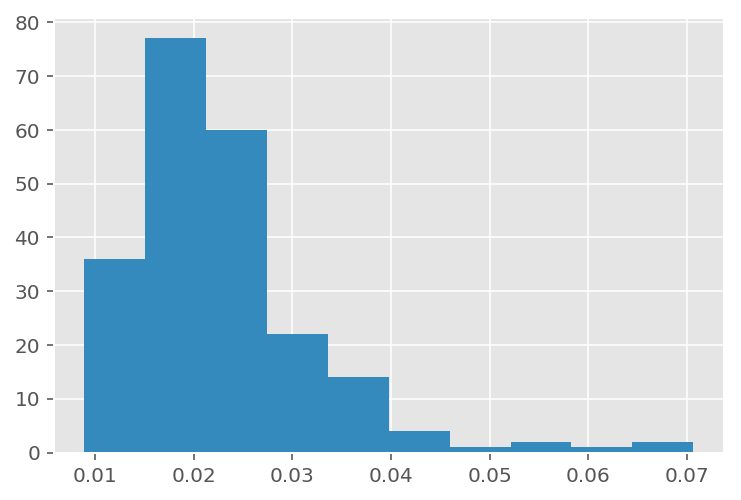

anime
(10,)


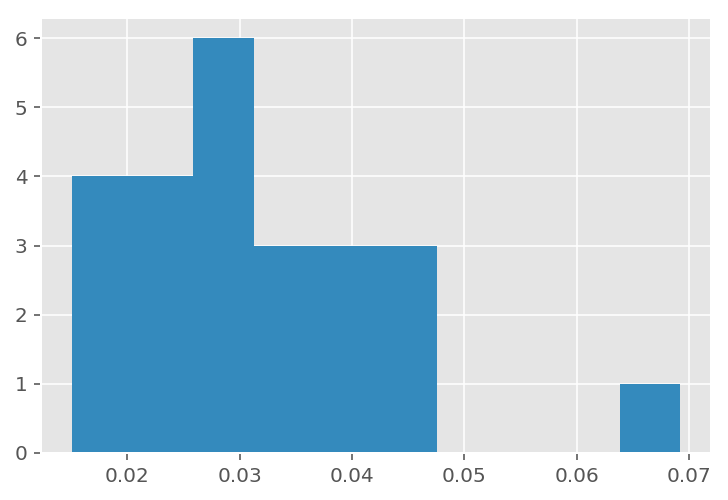

gospel
(10,)


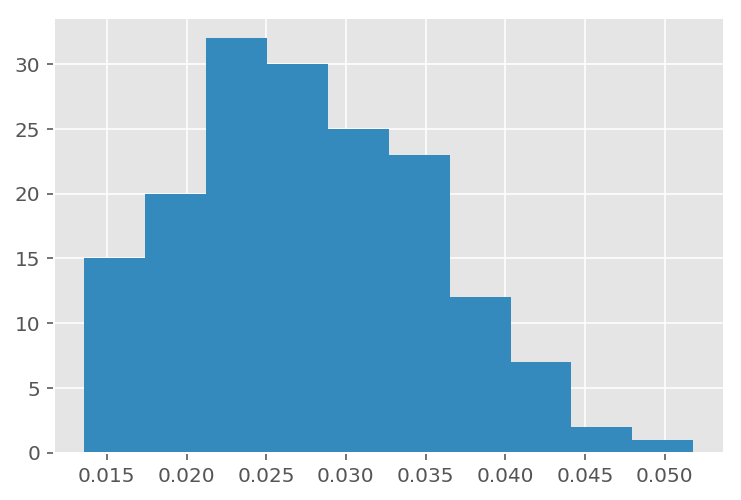

In [343]:
%matplotlib inline 
import numpy as np

hist_energy = np.arange(10)
j=0

for i in myset:    
    groundtruth_genre = groundtruth[groundtruth['genre1'] == i]
    training_data_genre = groundtruth_genre['recordingmbid'].apply(getOnlyUsedFeatures)
    print i
    energy = plt.hist(training_data_genre[14])
    print np.shape(loud[0])
    hist_energy = np.vstack((hist_energy, energy[0]))
    j = j+1
    plt.hist(training_data_genre[14])
    plt.show()
    plt.clf()

## Normalize Value in Array

In [221]:
genre_count = np.shape(hist_loudness)[0]

np.amax(hist_loudness[14])

for i in range(genre_count):
    max_value = np.amax(hist_loudness[i])
    array_length = np.shape(hist_loudness)[1]
    for j in range(array_length):
        hist_loudness[i,j] = hist_loudness[i,j]/max_value
        

In [223]:
hist_loudness

array([[ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
         0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ],
       [ 0.04511278,  0.04511278,  0.02255639,  0.01503759,  0.05263158,
         0.10526316,  0.07518797,  0.13533835,  0.42857143,  1.        ],
       [ 0.36363636,  0.09090909,  0.09090909,  0.18181818,  0.36363636,
         0.18181818,  0.18181818,  0.45454545,  0.81818182,  1.        ],
       [ 1.        ,  0.40104167,  0.234375  ,  0.18229167,  0.14583333,
         0.11458333,  0.125     ,  0.22916667,  0.15625   ,  0.09895833],
       [ 0.01635769,  0.01090513,  0.01090513,  0.01853871,  0.02399128,
         0.03053435,  0.04580153,  0.13304253,  0.36750273,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.02222222,  0.02222222,  0.06666667,  0.02222222,  0.02222222,
         0.17777778,  0.28888889,  0.37777778

## Calculate Similarity

In [225]:
def histograms_similarity(histogram0, histogram1):
  hs_sim = histogram0.astype(np.float32) - histogram1.astype(np.float32)
  sim = 0
  for i in range(0, hs_sim.size):
    if(hs_sim[i] < 0):
      sim = sim + histogram0[i]
    else:
      sim = sim + histogram1[i]
     
  return sim

In [280]:
# Example.
print '1 vs 2: %.6f' % histograms_similarity(
    hist_loudness[0, :],
    hist_loudness[5, :])

1 vs 2: 0.555556


In [281]:
def compute_self_similarity(feature_vector_matrix, similarity_function = histograms_similarity):
  matsize = np.shape(feature_vector_matrix)[0]
  sim_matrix = np.zeros((matsize, matsize))
  for i in range(0, matsize):
    for j in range(0, matsize):
        sim_matrix[i, j] = similarity_function(feature_vector_matrix[i,:], feature_vector_matrix[j,:])
  return sim_matrix

## Create Similarity Matrix

In [233]:
histograms_self_similarity = compute_self_similarity(
    hist_loudness, histograms_similarity)
print 'HS histograms self-similarity matrix size: %d x %d' % np.shape(histograms_self_similarity)

HS histograms self-similarity matrix size: 32 x 32


In [245]:
np.amax(histograms_self_similarity)

6.9705882352941169

<IPython.core.display.Javascript object>


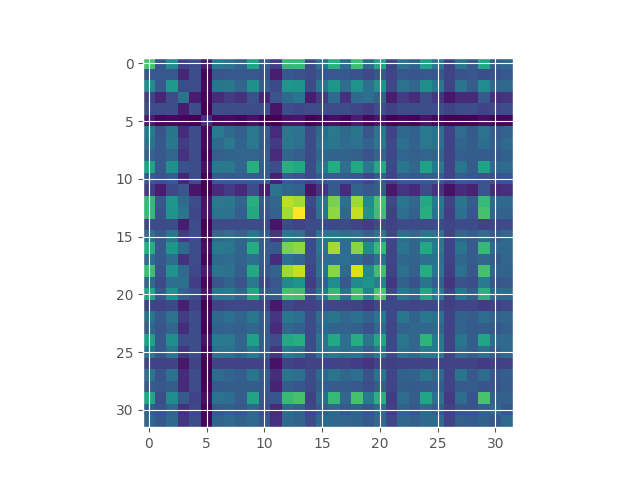

In [232]:
%matplotlib notebook

plt.figure()
plt.imshow(histograms_self_similarity)

## Create Dissimilarity Matrix

In [282]:
def histograms_dissimilarity(histogram0, histogram1):
  hs_dsim = abs(histogram0.astype(np.float32) - histogram1.astype(np.float32))
  dsim = 0
  for i in range(hs_dsim.size):
    dsim = dsim + hs_dsim[i]
     
  return dsim

In [283]:
histograms_dissimilarity(hist_loudness[0, :], hist_loudness[1, :])

3.1654135510325432

In [284]:
# Example.
print '1 vs 2: %.2f' % histograms_dissimilarity(
    hist_loudness[0, :],
    hist_loudness[5, :])

1 vs 2: 4.89


In [285]:
def compute_self_dissimilarity(feature_vector_matrix, dissimilarity_function = histograms_dissimilarity):
  matsize = np.shape(feature_vector_matrix)[0]
  dsim_matrix = np.zeros((matsize, matsize))
  for i in range(0, matsize):
    for j in range(0, matsize):
        dsim_matrix[i, j] = dissimilarity_function(feature_vector_matrix[i,:], feature_vector_matrix[j,:])
  return dsim_matrix

In [286]:
histograms_self_dissimilarity = compute_self_dissimilarity(
    hist_loudness, histograms_dissimilarity)
print 'HS histograms self-dissimilarity matrix size: %d x %d' % np.shape(histograms_self_dissimilarity)

HS histograms self-dissimilarity matrix size: 32 x 32


<IPython.core.display.Javascript object>


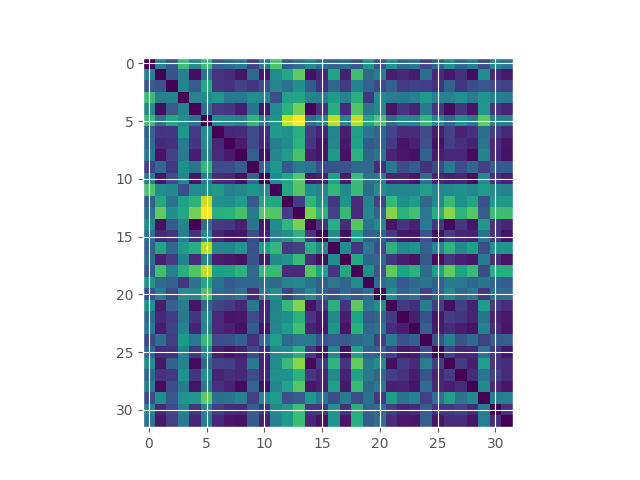

In [327]:
%matplotlib notebook

plt.figure()
plt.imshow(histograms_self_dissimilarity)

In [288]:
myset

{'anime',
 'blues',
 'celtic',
 'childrens',
 'christmas/holiday',
 'classical',
 'comedy',
 'country',
 'dance',
 'drumnbass',
 'dubstep',
 'easylistening',
 'electronic',
 'folk',
 'funk',
 'game',
 'gospel',
 'hiphop',
 'industrial',
 'jazz',
 'latin',
 'newage',
 'reggae',
 'reggaeton',
 'rnb',
 'rock/pop',
 'soundtrack',
 'spoken',
 'techno',
 'trance',
 'world'}

## Train SVM

In [279]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(svm.SVC(kernel='rbf', class_weight='balanced'))

In [19]:
#clf = svm.SVC()
clf.fit(training_data[0:1000], groundtruth['genre1'][0:1000])

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [280]:
test_features = training_data[-100:]
test_label = groundtruth['genre1'][-100:]
print test_label
print clf.predict(test_features)

485220      rock/pop
485246      rock/pop
485259      rock/pop
485268          jazz
485282         blues
485291    electronic
485295          jazz
485298          jazz
485304          jazz
485318      rock/pop
485322    electronic
485327          jazz
485338      rock/pop
485348      rock/pop
485362      rock/pop
485368      rock/pop
485379       country
485388      rock/pop
485390    industrial
485419      rock/pop
485430      rock/pop
485433        hiphop
485485      rock/pop
485494           rnb
485509      rock/pop
485518      rock/pop
485527     classical
485543      rock/pop
485553          folk
485592      rock/pop
             ...    
486273      rock/pop
486275     classical
486311        hiphop
486317    electronic
486323      rock/pop
486330     drumnbass
486348       country
486354         dance
486406        reggae
486413         dance
486418      rock/pop
486440    electronic
486454      rock/pop
486455      rock/pop
486486          jazz
486503      rock/pop
486525    ele

NotFittedError: This OneVsRestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [25]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

model = GaussianNB()

In [26]:
# Train the model using the training sets 
model.fit(training_data[0:1000], groundtruth['genre1'][0:1000])

GaussianNB(priors=None)

In [28]:
#Predict Output 
predicted= model.predict(test_features)
print predicted
print test_label

['world' 'rock/pop' 'gospel' 'easylistening' 'rock/pop' 'rock/pop'
 'rock/pop' 'country' 'rock/pop' 'rock/pop' 'rock/pop' 'rock/pop'
 'industrial' 'rock/pop' 'gospel' 'country' 'gospel' 'jazz' 'dubstep'
 'gospel' 'gospel' 'rock/pop' 'rock/pop' 'gospel' 'jazz' 'rock/pop'
 'classical' 'rock/pop' 'jazz' 'rock/pop' 'hiphop' 'rock/pop' 'hiphop'
 'electronic' 'rock/pop' 'dance' 'rock/pop' 'rock/pop' 'rock/pop' 'country'
 'rock/pop' 'jazz' 'soundtrack' 'classical' 'country' 'easylistening'
 'rock/pop' 'electronic' 'christmas/holiday' 'rock/pop' 'rock/pop'
 'rock/pop' 'rock/pop' 'reggae' 'jazz' 'reggae' 'easylistening' 'dubstep'
 'gospel' 'rock/pop' 'dance' 'country' 'dance' 'electronic' 'gospel'
 'dubstep' 'dubstep' 'rock/pop' 'rock/pop' 'electronic' 'gospel'
 'soundtrack' 'hiphop' 'rock/pop' 'gospel' 'rock/pop' 'jazz' 'dance'
 'hiphop' 'rock/pop' 'christmas/holiday' 'hiphop' 'hiphop' 'folk'
 'rock/pop' 'hiphop' 'electronic' 'soundtrack' 'industrial' 'jazz'
 'soundtrack' 'industrial' 'rock/po

## Undersampling using imbalance dataset library

In [346]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [355]:
RANDOM_STATE = 50
X_train, X_test, y_train, y_test = train_test_split(training_data, groundtruth['genre1'],
                                                     random_state=RANDOM_STATE)

# Create a pipeline
# pipeline = make_pipeline(NearMiss(version=2, random_state=RANDOM_STATE),
#                          LinearSVC(random_state=RANDOM_STATE))
pipeline = make_pipeline(SMOTE(random_state=RANDOM_STATE), neighbors.KNeighborsClassifier(3))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(groundtruth['genre1'][-5000:], pipeline.predict(training_data[-5000:])))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


                         pre       rec       spe        f1       geo       iba       sup

            anime       0.33      0.25      1.00      0.29      0.58      0.31         4
            blues       0.33      0.59      0.97      0.42      0.57      0.30       129
           celtic       0.21      0.50      0.99      0.30      0.46      0.19        16
        childrens       0.19      0.57      1.00      0.29      0.44      0.17         7
christmas/holiday       0.23      0.41      0.99      0.29      0.48      0.21        37
        classical       0.35      0.67      0.98      0.46      0.59      0.33        72
           comedy       0.19      0.35      0.99      0.25      0.43      0.17        20
          country       0.28      0.49      0.96      0.36      0.53      0.26       168
            dance       0.35      0.59      0.94      0.44      0.58      0.32       253
        drumnbass       0.30      0.38      0.99      0.33      0.54      0.28        29
          dubstep   

In [356]:
predict_value = pipeline.predict(test_features)
predict_value = pd.DataFrame(predict_value)
predict_value

,0
0,country
1,electronic
2,jazz
3,rock/pop
4,rock/pop
5,blues
6,game
7,christmas/holiday
8,rock/pop
9,hiphop


In [ ]:
 pettyPrintJSON(loadFeatures('1a00a335-fead-46ec-8d4f-06e8341291ea'))

## Using Manual Sampling

In [281]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(svm.SVC(kernel='rbf', class_weight='balanced'))
#clf = svm.SVC()

### Utility for sampling data

In [282]:
import types

def loadFeatures(recordingmbid):
    feature_file_path = '{basepath}acousticbrainz-mediaeval-train/{id_prefix}/{id}.json'.format(
        basepath = settings['path'], id_prefix=recordingmbid[0:2], id = recordingmbid);
    
    with open(feature_file_path) as feature_file:    
        data = json.load(feature_file)
    
    return data

def pettyPrintJSON(object_to_print):
    print(json.dumps(object_to_print, sort_keys=True, indent=4))
    

def getOnlyUsedFeatures(recordingmbid):
    
    all_features = loadFeatures(recordingmbid)
    
    used_features = [
        'lowlevel.mfcc.mean',
         'lowlevel.average_loudness',
         'lowlevel.spectral_energy.mean']
    
    result_features = []
    
    for feature_name in used_features:
        reduced_features = all_features

        for k in feature_name.split('.'):
            reduced_features = reduced_features[k]
            
        if isinstance(reduced_features, float):
            result_features.append(reduced_features)
        else:
            result_features.extend(reduced_features)
        
    return pd.Series(result_features)
    

training_data = new_groundtruth['recordingmbid'].apply(getOnlyUsedFeatures)

print training_data.head()

              0           1          2          3          4          5   \
222  -757.410522  143.351929  30.720058  40.374134  12.259659  22.695099   
5163 -622.460754  120.010445 -24.441376  61.669952  23.378601  19.411152   
5211 -660.183838  105.466331 -44.736366  33.183750   4.030684   1.831322   
5528 -652.540894  105.092743   6.247697  35.812943  10.641813  12.699113   
7841 -627.532349  105.326485  10.515520  29.634504  15.812553   7.880708   

             6          7         8         9         10        11        12  \
222    8.884984  16.656294  4.062633  4.423255 -3.286869  3.100632  1.317561   
5163  13.289327  19.536486  6.003063 -2.192055 -2.114122  2.665754 -9.542829   
5211   2.200444   9.873156 -1.677568  8.432635  4.292105  5.713897  3.355641   
5528   6.654032   1.259725  3.706507  1.195580 -2.039037  0.899738 -1.336186   
7841   0.214934   5.998834  1.339808  2.043393  2.620259  3.874744  0.548984   

            13        14  
222   0.860796  0.063825  
5163  0.

In [283]:
from collections import Counter
genre = Counter(new_groundtruth.genre1).keys() # equals to list(set(words))
counter = Counter(new_groundtruth.genre1).values() # counts the elements' frequency

df = pd.DataFrame(genre)
df_2 = pd.DataFrame(counter)
df_new = pd.concat([df, df_2], axis=1)
df_new

,0,0
0,industrial,256
1,childrens,41
2,classical,300
3,dance,300
4,latin,300
5,dubstep,128
6,blues,300
7,electronic,300
8,folk,300
9,trance,137


In [284]:
clf.fit(training_data, new_groundtruth['genre1'])

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

### Prepare test set

In [212]:
test_features = training_data[-1000:]
test_label = new_groundtruth['genre1'][-1000:]

test_result = []

print type(test_features)
print type(test_label)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [285]:
testing_set = groundtruth.sample(n=100)
test_label = testing_set['genre1']
test_features = testing_set['recordingmbid'].apply(getOnlyUsedFeatures)

In [286]:
print testing_data.head()

                0           1          2          3          4          5   \
142985 -643.782776  110.330078  10.721222  15.830173   2.270084   9.811247   
247376 -630.655273  122.476532 -11.676052   2.882936   5.916487   4.646982   
437905 -608.795105  117.865372  -6.783601  24.987970  -4.868780  -1.151578   
268648 -637.430786  131.684921  -4.578714  34.365849   3.820896   1.591835   
378876 -761.019958  149.381516 -43.415569 -14.612414 -24.323723 -22.204174   

              6         7         8         9         10        11        12  \
142985  2.749866  2.131807  1.998546 -5.153105 -0.566470 -3.326690 -3.417902   
247376 -2.014705  1.363528  2.887549  1.935196  1.582888 -1.605943 -0.771283   
437905  1.601822  9.331568 -0.450760  2.737285 -2.268553  1.630903  0.541255   
268648 -3.207471  4.591861 -1.574137  3.451968 -2.863428 -4.188984 -0.857179   
378876  8.053460 -7.774739 -6.341846  6.577975  3.595063  5.335145  4.442763   

              13        14  
142985  0.912175  0.0

In [287]:
test_label = test_label.reset_index()

In [288]:
predict_value = clf.predict(test_features)
predict_value = pd.DataFrame(predict_value)

In [357]:
print type(test_label)
test_label = pd.DataFrame(test_label)


<class 'pandas.core.frame.DataFrame'>


In [358]:
test_result = pd.DataFrame()
test_result

""


In [359]:
test_result = test_label
print type(test_result)
test_result

<class 'pandas.core.frame.DataFrame'>


,index,genre1,predict,checker
0,46998,hiphop,funk,0
1,469213,world,funk,0
2,232038,jazz,reggae,0
3,77674,rock/pop,gospel,0
4,317954,dance,gospel,0
5,337586,rock/pop,gospel,0
6,470091,game,reggae,0
7,77179,christmas/holiday,gospel,0
8,438108,rock/pop,funk,0
9,397855,dance,reggae,0


In [360]:
test_result["predict"] = predict_value
test_result

,index,genre1,predict,checker
0,46998,hiphop,country,0
1,469213,world,electronic,0
2,232038,jazz,jazz,0
3,77674,rock/pop,rock/pop,0
4,317954,dance,rock/pop,0
5,337586,rock/pop,blues,0
6,470091,game,game,0
7,77179,christmas/holiday,christmas/holiday,0
8,438108,rock/pop,rock/pop,0
9,397855,dance,hiphop,0


In [361]:
for i in xrange(100):
    if test_result["genre1"][i] == test_result["predict"][i]:
        test_result["checker"][i] = 1
    else:
        test_result["checker"][i] = 0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [362]:
test_result

,index,genre1,predict,checker
0,46998,hiphop,country,0
1,469213,world,electronic,0
2,232038,jazz,jazz,1
3,77674,rock/pop,rock/pop,1
4,317954,dance,rock/pop,0
5,337586,rock/pop,blues,0
6,470091,game,game,1
7,77179,christmas/holiday,christmas/holiday,1
8,438108,rock/pop,rock/pop,1
9,397855,dance,hiphop,0


In [363]:
test_result["checker"].sum()

48